In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
import os
import IPython.display as display
import tensorflow as tf
import glob
from convert_to_tfrecords import *
AUTO = tf.data.experimental.AUTOTUNE
# cat_img = io.imread('cat.jpg')
# io.imshow(cat_img)

In [2]:
images_path = glob.glob("/home/z3u5/Desktop/dataset/*.jpg")
print(len(images_path))

139518


In [3]:
"""
to convert to tfrecord
"""
tf_record_file_number = 13
tf_record_base_name = "patches"
tf_record_file_path = "/home/z3u5/Desktop/tfrecords/"+tf_record_base_name+str(tf_record_file_number)+".tfrecord"
example_number = 32500
for i in range(13,18):
    write_to_tfrecord(tf_record_file_path,images_path,example_number,examples_per_tfrecord=2500)
    tf_record_file_number += 1
    tf_record_file_path = "/home/z3u5/Desktop/tfrecords/"+tf_record_base_name+str(tf_record_file_number)+".tfrecord"
    example_number += 2500

In [10]:
tf_record_filepaths = glob.glob("/home/z3u5/Desktop/tfrecords/*")
print(sorted(tf_record_filepaths))
tf_record_filepaths = ['/home/z3u5/Desktop/tfrecords/patches13.tfrecord', '/home/z3u5/Desktop/tfrecords/patches14.tfrecord','/home/z3u5/Desktop/tfrecords/patches15.tfrecord', '/home/z3u5/Desktop/tfrecords/patches16.tfrecord','/home/z3u5/Desktop/tfrecords/patches17.tfrecord']

['/home/z3u5/Desktop/tfrecords/patches0.tfrecord', '/home/z3u5/Desktop/tfrecords/patches1.tfrecord', '/home/z3u5/Desktop/tfrecords/patches10.tfrecord', '/home/z3u5/Desktop/tfrecords/patches11.tfrecord', '/home/z3u5/Desktop/tfrecords/patches12.tfrecord', '/home/z3u5/Desktop/tfrecords/patches13.tfrecord', '/home/z3u5/Desktop/tfrecords/patches14.tfrecord', '/home/z3u5/Desktop/tfrecords/patches15.tfrecord', '/home/z3u5/Desktop/tfrecords/patches16.tfrecord', '/home/z3u5/Desktop/tfrecords/patches17.tfrecord', '/home/z3u5/Desktop/tfrecords/patches2.tfrecord', '/home/z3u5/Desktop/tfrecords/patches3.tfrecord', '/home/z3u5/Desktop/tfrecords/patches4.tfrecord', '/home/z3u5/Desktop/tfrecords/patches5.tfrecord', '/home/z3u5/Desktop/tfrecords/patches6.tfrecord', '/home/z3u5/Desktop/tfrecords/patches7.tfrecord', '/home/z3u5/Desktop/tfrecords/patches8.tfrecord', '/home/z3u5/Desktop/tfrecords/patches9.tfrecord']


In [11]:
"""
to read tfrecord
"""
ignore_order = tf.data.Options()
ignore_order.experimental_deterministic = False #to ignore order of files 
dataset = tf.data.TFRecordDataset(sorted(tf_record_filepaths), num_parallel_reads=AUTO)#path to tfrecord file
dataset = dataset.with_options(ignore_order)
dataset = dataset.map(read_labeled_tfrecord,num_parallel_calls=AUTO) #decoding tf records in parallel
dataset = dataset.shuffle(2048) # to shuffle dataset
dataset = dataset.batch(128)    # making batches

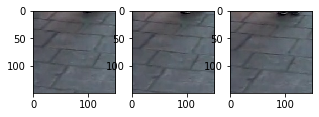

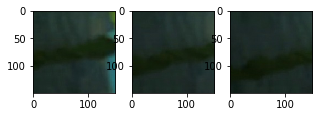

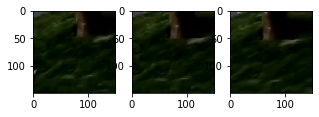

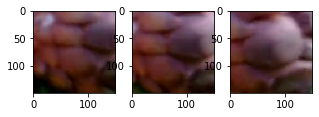

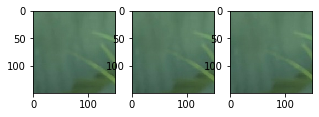

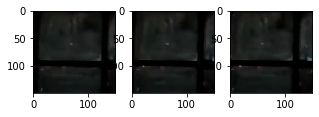

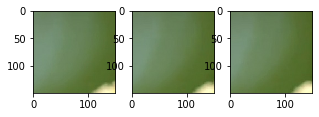

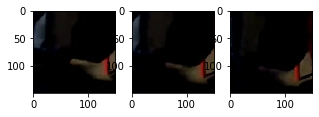

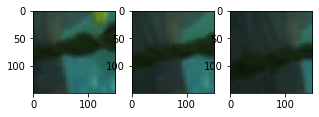

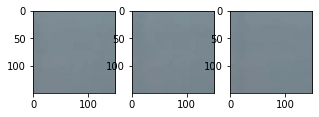

In [8]:
for image_features in dataset.unbatch().take(10):
    w=20
    h=20
    fig=plt.figure(figsize=(5, 5))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        img = image_features[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    